In [45]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import chi2, f_classif
from itertools import islice
from collections import Counter
from scipy import stats
from boltons.iterutils import pairwise

from span_clf import Corpus, read_json_gz_lines
from headline_parser import parse_headline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [72]:
pd.options.display.max_rows = 100

In [65]:
seen = set()
pairs = []
for row in tqdm(islice(read_json_gz_lines('data/cleaning-titles.json/'), 100000)):
    
    doc = parse_headline(row['title'])
    spans = tuple([s._.clf_text for s in doc._.spans if s._.clf_text])
    
    if spans not in seen:
        pairs.append(({span: 1 for span in spans}, row['domain']))
        seen.add(spans)
        counts.update(spans)
        if 'dear republicans google exists' in spans:
            print(row)

84592it [00:57, 1458.88it/s]

{'domain': 'dailykos.com', 'title': 'Dear Republicans, Google exists'}


100000it [01:08, 1450.85it/s]


In [53]:
X, y = zip(*pairs)

In [54]:
dv = DictVectorizer(sparse=True)

In [55]:
X = dv.fit_transform(X)

In [56]:
feature_names = np.array(dv.get_feature_names())

In [57]:
scores, p = chi2(X, y)

In [58]:
df = pd.DataFrame(list(zip(feature_names, scores, p)), columns=('span', 'chi', 'p'))

In [59]:
df.sort_values('chi', ascending=False).head(10)

,span,chi,p
23947,dailycaller,71776.754047,0.0
15988,breitbart,51479.545475,0.0
21346,cnn video,21613.652533,0.0
87433,the daily caller,10021.754308,0.0
55474,listen now,7985.322772,0.0
9375,analysis,6614.174267,0.0
104318,video,5478.465273,0.0
68026,opinion,4920.304411,0.0
70191,perspective,3706.199901,0.0
88730,the latest,2519.019667,0.0


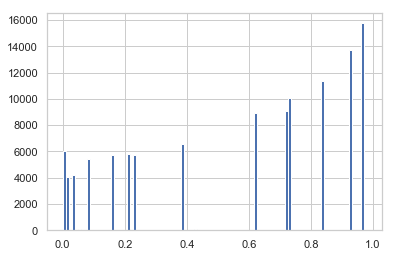

In [60]:
# plt.yscale('log')
_ = plt.hist(df.p, bins=100)

In [61]:
len(df)

113361

In [71]:
len(df[df.p<0.01])

6048

In [76]:
df[df.p<0.0001].sort_values('chi', ascending=False)

,span,chi,p
23947,dailycaller,71776.754047,0.000000e+00
15988,breitbart,51479.545475,0.000000e+00
21346,cnn video,21613.652533,0.000000e+00
87433,the daily caller,10021.754308,0.000000e+00
55474,listen now,7985.322772,0.000000e+00
9375,analysis,6614.174267,0.000000e+00
104318,video,5478.465273,0.000000e+00
68026,opinion,4920.304411,0.000000e+00
70191,perspective,3706.199901,0.000000e+00
88730,the latest,2519.019667,0.000000e+00


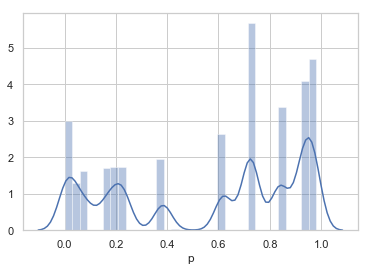

In [70]:
sns.distplot(df.p)

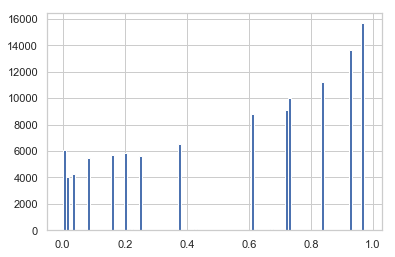

In [98]:
_ = plt.hist(df.p, bins=100)

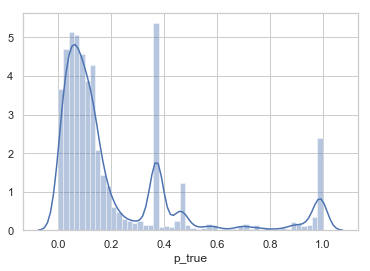

In [50]:
sns.distplot(df.p_true)